## Clustering as a Preprocessing Step <br>

<b> Introduction </b>

Hard clustering is what you expect from using a clustering algorithm on data. Hard clustering results in a new column including the cluster label for each instance in the dataset. An alternative method is known as soft clustering. This is where we transform the dataset to contain scores representing the similarity of each data point to each cluster. This could be achieved by outputting the distance to each cluster centroid.

The soft clustering step is used prior to using a supervised algorithm. The supervised algorithm will use the distances from each cluster in order to predict the output. If k < features, we can reduce the dimensionality of the dataset and possibly improve accuracy/precision.

We can then use this new output to predict /classify in our supervised machine learning tasks. In this notebook we will return to the MNIST dataset. <br> 

The MNIST dataset is a perfect example since we have a high number of features (columns). Let's assess if reducing the number of columns loses information or will the transformed dataset perform better than the raw intensity of each pixel.

<b> High Level Objectives </b>
- Create a supervised model to predict handwritten digits
- Create the same supervised model with unsupervised learning as the preprocessing step
- Compare the performance of the models

<img src="Images/mnist_images.PNG" width = "500"/>

<b> Contents </b> <br>
<a href="#map1">1. Import Relevant Libaries </a> <br>
<a href="#map2">2. Import Data </a>  <br>
<a href="#map3">3. Prepare Data </a> <br>
<a href="#map4">4. Baseline Model </a> <br>
<a href="#map5">5a. Apply Soft Clustering (Unsupervised Learning) </a><br>
<a href="#map7">6. Discussion </a><br>
<a href="#map8">7. Conclusion </a>


#### 1. Import Relevant Libaries

In [6]:
#Handling data and preperations
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

#evaluation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

#Visualisations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.multiclass import multi_eval,multi_confmxs


#### 2. Import Data

Scikit learn has some frequently stored datasets available for you to access. Here we will import the MNIST dataset directly from Sklearn.

In [7]:
X_digits, y_digits = load_digits(return_X_y=True)           

#### 3. Prepare Data
Split the data into a training and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 42) #Split some X into train and remaining into test. Labels for those split too

In [9]:
X_train.shape

(1347, 64)

1347 Training Images (rows) <br>
64   pixels (columns that are our features)

- Each column is the intensity of a pixel. 
- The image below describes an image 
- Simply a grid of light bulbs (pixels), the value of the pixel represents the strength of the light bulb <br>
NOTE: We are working with greyscale images where one value represents a pixel. Coloured images would contain three values per pixel (R,G,B).

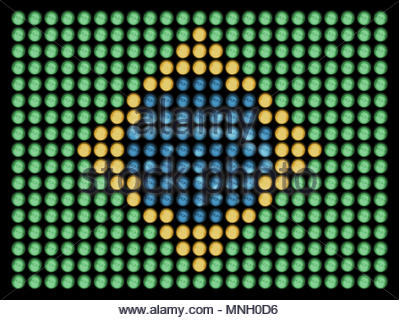

##### Class Balance <br>

The following code determines the count of each class in the dataset. It's important to understand if we are handling imbalanced data

In [10]:
unique, counts = np.unique(x_train, return_counts=True)

I = np.asarray((unique, counts)).T

bcdata = pd.DataFrame({'Number': I[:, 0],
                    'Count':I[:,1]})


NameError: name 'x_train' is not defined

In [40]:
# Initialize the matplotlib figure
def freq_barchart(data, x_axis = "column1", is_numpy = True, color_code = "dark", color = "r", title = "Frequency Breakdown"):
    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()
        unique, counts = np.unique(data, return_counts=True)
        I = np.asarray((unique, counts)).T
        plotdf = pd.DataFrame({x_axis: I[:, 0],
                    'Count':I[:,1]})
        f, ax = plt.subplots(figsize=(6, 6))
        sns.set_color_codes(color_code)
        sns.barplot(x=x_axis, y="Count", data=plotdf,
                        label="Total", color=color).set_title(title)
    else:
        try:
            unique, counts = np.unique(data, return_counts=True)
            I = np.asarray((unique, counts)).T
            plotdf = pd.DataFrame({x_axis: I[:, 0],
                    'Count':I[:,1]})
            f, ax = plt.subplots(figsize=(6, 6))
            sns.set_color_codes(color_code)
            sns.barplot(x=x_axis, y="Count", data=plotdf, label="Total", color=color).set_title(title)
            
            
        except:
            print("Please provide a numpy or pandas dataframe")

    

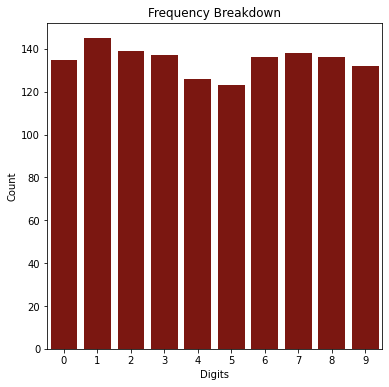

In [41]:
freq_barchart(y_train,x_axis="Digits")

- Data is fairly balanced with approximately 130 images per class

#### 4a. Create Benchmark Model 
We need to compare if our model performs better with KMeans as a preprocessing step so let's create a benchmark model.


In [11]:
log_reg = LogisticRegression(random_state =42,
                             multi_class = "auto",
                             solver ='liblinear')


log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### 4b. Evaluating Benchmark Model

Generally accuracy isn't the best metric to use for comparison, especially for imbalanced data. However, since our data is balanced we can still gain value from using accuracy.

In addition to accuracy we will show a confusion matrix (focused on correct predictions) and a confusion matrix (focused on the errors). This will help us better understand how our model has improved. The average precision and recall based on all classes will be included too.

In [12]:
accuracy = cross_val_score(log_reg,X_train,y_train)
accuracy

array([0.95185185, 0.95555556, 0.94052045, 0.95167286, 0.92565056])

In [13]:
y_train_pred = cross_val_predict(log_reg,X_train,y_train, cv=3)
multi_eval(log_reg,X_train,y_train,y_train_pred,cv=3)

[[133   0   0   0   0   1   0   0   1   0]
 [  0 129   1   2   0   0   0   0   9   4]
 [  0   0 136   3   0   0   0   0   0   0]
 [  0   0   0 125   0   2   0   4   3   3]
 [  0   3   0   0 121   0   0   1   1   0]
 [  0   1   0   1   0 117   0   2   1   1]
 [  0   1   0   0   1   0 133   0   1   0]
 [  0   1   0   1   1   0   0 133   1   1]
 [  0   6   0   1   1   1   0   1 125   1]
 [  0   0   0   1   0   2   0   2   2 125]]
Accuracy  = 94.51%
Average Precision = 94.92%
Average Recall = 94.85%


In [14]:
conf_mx_1 = multi_eval.conf_mx
precision_1 = multi_eval.precision
recall_1 = multi_eval.recall
accuracy_1 = multi_eval.accuracy

In [15]:
labels = [0,1,2,3,4,5,6,7,8,9]

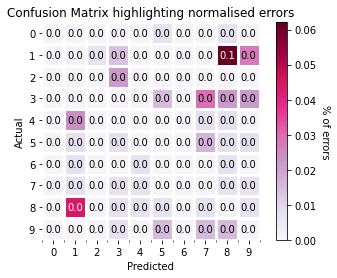

Accuracy  = 94.51%
Average Precision = 94.92%
Average Recall = 94.85%


In [16]:
multi_confmxs(conf_mx_1 ,labels,labels,accuracy = accuracy_1,precision = precision_1, recall = recall_1, normalised_errors = True)

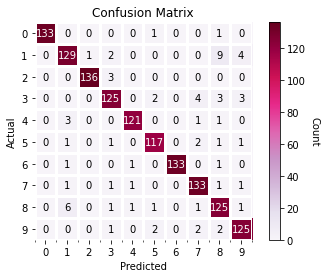

hello
Accuracy  = 94.51%
Average Precision = 94.92%
Average Recall = 94.85%


In [18]:
multi_confmxs(conf_mx_1 ,labels,labels,accuracy = accuracy_1,precision = precision_1, recall = recall_1, normalised_errors = False)

#### 5a.  Unsupervised Learning - KMeans as a Preprocessing step

#### GridsearchCV
Instead of working out the optimal value through the Elbow Curve, we can leverage gridsearchcv to trial various values of K and compare their performances. We can try values from 60 to 120 as the elbow curve is used as a guide to remove the range of values that are highly likely to perform more poorly.

Methodology:
- Build a model with k = 60-120
- Score model using cross validation
- select the most with the best performance

In [19]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50, random_state= 42)),
    ("log_reg", LogisticRegression(random_state =42, multi_class = "auto", solver ='liblinear'))
])

In [20]:
param_grid = dict(kmeans__n_clusters = range(60,80))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose =2)
grid_clf.fit(X_train,y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] kmeans__n_clusters=60 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=60, total=   0.9s
[CV] kmeans__n_clusters=60 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=60, total=   1.0s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   1.1s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   1.0s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.9s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   1.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   1.2s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   1.4s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

KeyboardInterrupt: 

In [ ]:
grid_clf.best_params_

In [ ]:
model = grid_clf.best_estimator_ 

In [21]:
k = 63
kmeans = KMeans(n_clusters = k,  random_state=42)
X_digits_dist = kmeans.fit_transform(X_train) 

                 


Xdst = pd.DataFrame(X_digits_dist)

In [22]:
Xdst["Target"] = y_train

In [23]:
Xdst #Viewing the soft clustered results 

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Target
0,45.507331,40.744845,53.199896,44.907457,37.850950,32.821483,42.664255,49.817297,44.894465,40.442249,...,42.338770,38.538901,48.793037,49.108736,49.638446,48.034155,45.237783,47.625938,33.443585,5
1,51.263214,43.434537,43.152778,50.835530,50.900829,59.574817,49.234678,43.286986,41.335955,49.309959,...,43.760713,61.451175,35.727120,46.211935,50.344124,56.784505,39.164168,46.295032,47.196116,2
2,46.914753,39.438463,47.377515,17.143039,48.011815,44.246637,44.720301,53.968991,45.666201,50.284257,...,51.124498,47.206664,44.189106,51.046968,49.031484,54.261220,37.245228,44.236071,42.440142,0
3,28.952113,20.661374,44.333910,39.793422,41.320387,43.618262,32.217688,39.937268,44.527915,41.766465,...,43.757448,47.265470,39.486416,43.039725,38.237239,40.734261,36.420558,40.755736,39.243965,8
4,43.307419,40.347148,45.456524,52.112380,17.000424,48.496561,53.875867,43.937289,44.919208,21.020261,...,36.897542,48.709139,50.164002,41.849946,39.572406,46.817518,46.289384,49.992299,47.327138,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,46.474081,47.029874,21.457607,47.411207,50.650710,59.432988,57.045935,53.904100,51.496441,50.956942,...,50.257906,57.788140,28.899431,52.132456,54.942169,49.072192,28.617425,34.021023,39.646664,3
1343,46.794085,39.120230,49.005056,54.142538,44.724651,54.782557,55.783458,45.000454,44.112168,36.445372,...,26.147931,55.557000,45.424961,15.597851,46.725888,50.721593,46.865041,47.588129,52.776855,7
1344,37.632763,34.609378,39.783944,46.593401,36.117785,55.206017,52.128561,42.707491,47.791930,33.151008,...,41.641326,57.528951,43.936626,39.473636,25.722402,48.225305,39.974455,49.100204,51.345851,2
1345,42.190888,31.934449,45.619757,44.903140,20.064257,39.752356,47.129233,39.543742,41.079801,23.378954,...,37.363083,43.343873,47.557969,40.375339,39.062312,40.756349,42.146554,44.466054,41.397839,7


#### 6. Evaluate 

In [24]:
y_train_pred2 = cross_val_predict(model,X_train,y_train, cv=3)
metrics(model,X_train,y_train,y_train_pred2,cv=3)

NameError: name 'model' is not defined

In [ ]:
conf_mx_2 = metrics.conf_mx
precision_2 = metrics.precision
recall_2 = metrics.recall
accuracy_2 = metrics.accuracy
conf_mx_2

In [ ]:
multiclass_confmx_correct_predictions(conf_mx_2 ,accuracy_2,precision_2,recall_2)

In [ ]:
norm_conf_mx_2 = error_matrix(conf_mx_2)

In [ ]:
multiclass_confmx_errors(norm_conf_mx_2,accuracy_2,precision_2,recall_2)

In [ ]:
str(((grid_clf.score(X_test, y_test)*100).round(2))) + ' %'

In [ ]:
str(((log_reg.score(X_test,y_test)*100).round(2))) + ' %'

In [ ]:
representative_digits_idx = np.argmin(X_digits_dist, axis = 0)         #np.argmin returns the index position of the lowest value each column
                                                                       #Since we specificed axis = 0 we will get the lowest value per column
                                                                       #Each column is a cluster so we should have 50 values at the end.

In [ ]:
X_Representative_Images = X_train[representative_digits_idx]

In [ ]:
X_Representative_Images.shape #As expected, 50 images with 64 columns. Each column is a pixel that can be reshaped to 8x8

In [ ]:
representative_digits_idx

In [ ]:
X_Representative_ImagesFinal =  X_train[representative_digits_idx]

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_Representative_ImagesFinal in enumerate(X_Representative_ImagesFinal):
    plt.subplot(70 // 10, 10, index+1)                                 #k//10 = 5 rows, 10 columns, and index+1 is for the order.
    plt.imshow(X_Representative_ImagesFinal.reshape(8, 8), cmap="binary",interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
def plot_digits(instances, images_per_row=10,size = 28, **options):
    size = size                                                    #28x28 image therefore size = 28
    images_per_row = min(len(instances), images_per_row)           #10 set into method, but len(instances) incase less than 10               
    images = [instance.reshape(size,size) for instance in instances] #Reshapes all the images to the desired size 28 by 28 and stores into a list      
    n_rows = (len(instances)-1) // images_per_row +1                             
    row_images = []
    n_empty = n_rows * images_per_row - len(instances) 
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


In [ ]:
plt.figure(figsize=(9,9))
example_images = X_train[:100]
plot_digits(example_images, images_per_row=10)

plt.show()